### Tasks 6, 7, 8 and 9: Develop the ShowerEnv Class

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class ShowerEnv(gym.Env):
    def __init__(self, Thot, Tcold, max_angle_change, Tdesired):
        self.Thot = Thot
        self.Tcold = Tcold
        self.max_angle_change = max_angle_change
        self.Tdesired = Tdesired        
        self.cold_flow_rate = 50

    def reset(self):       
        self.angle_hot = 20          
        self.state = (self.angle_hot *self.Thot + self.cold_flow_rate * self.Tcold) \
                    / (self.angle_hot + self.cold_flow_rate)

        return np.array([self.state])

    def step(self, action):
        angle_change =  (action-10)*10        
        self.angle_hot = np.clip(self.angle_hot + angle_change, 0, 100)
        flow_hot = self.angle_hot          
        self.state = (flow_hot * self.Thot + self.cold_flow_rate * self.Tcold) / (
        flow_hot + self.cold_flow_rate)
        
        error = 3               
        if abs(self.state - self.Tdesired) <= error:
            reward = 10
        elif abs(self.state - self.Tdesired) <= error*2:
            reward = -1
        elif abs(self.state - self.Tdesired) <= error*3:
            reward = -5
        else:
            reward = -10
            
        if abs(self.state - self.Tdesired) <=  1.5*error:
            done = True
        else:
            done = False
        return np.array([self.state]), reward, done

### Task 10: Train the Agent

In [4]:
   from usercode.Agent2 import Agent2
if __name__ == '__main__':
    env = ShowerEnv(Thot=100, Tcold=5,
                        Tdesired=35, max_angle_change = 10)
    agent = Agent2(gamma=0.99,lr = 0.1, n_actions =21,
            eps_dec=0.9, eps_end= 0.01, eps_start=1.0)
    scores = []
    n_eps = 1000
    steps = 0       
    
    for i in range(n_eps):
        done = False
        state = env.reset()
        score = 0
        
        while not done:
            action = agent.choose_actions(state)
            state_, reward, done = env.step(action)
            agent.learn(state, action, reward, state_)
            score += reward
            state = state_
            steps += 1        
        
        scores.append(score) 

Text(0, 0.5, 'reward')

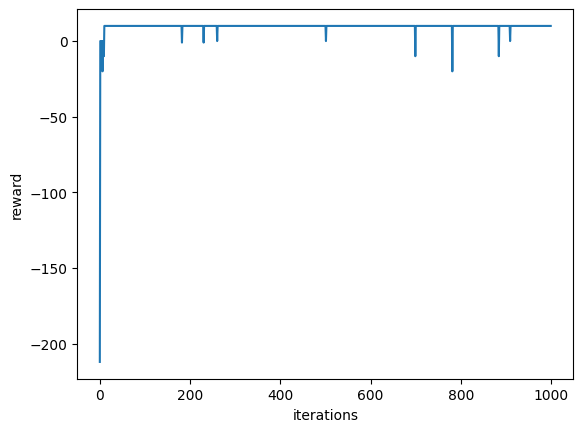

In [5]:
plt.plot(scores)     
plt.xlabel('iterations')
plt.ylabel('reward')